# Library & Data Loading

In [1]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader # Dataset, Dataloader
from torch.utils.tensorboard import SummaryWriter # Logger
import torchvision
from torchvision import transforms as T

In [2]:
!pip install -U transformers simpletransformers

     |████████████████████████████████| 3.1 MB 6.9 MB/s 
     |████████████████████████████████| 231 kB 51.7 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
     |████████████████████████████████| 3.3 MB 38.2 MB/s 
     |████████████████████████████████| 895 kB 36.2 MB/s 
     |████████████████████████████████| 59 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 47.6 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 1.7 MB 38.9 MB/s 
     |████████████████████████████████| 8.3 MB 28.8 MB/s 
     |████████████████████████████████| 290 kB 50.8 MB/s 
     |████████████████████████████████| 180 kB 57.3 MB/s 
     |████████████████████████████████| 97 kB 5.8 MB/s 
     |████████████████████████████████| 139 kB 53.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 243 kB 56.0 MB/s 
     |████████████████████████████████| 1.1 MB 63.4 MB/s 
     |█████████████████

In [3]:
pip install tensorboardX

     |████████████████████████████████| 124 kB 8.8 MB/s 


In [5]:
!pip install tweet-preprocessor

In [6]:
import os
import pandas as pd
import numpy as np
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from preprocessor.api import clean

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab/Talosix")
train = pd.read_csv('train_multi_label.csv',usecols=['Consult - History and Phy.', 'Surgery', 'Other','Orthopedic','Cardiovascular / Pulmonary', 'text']).dropna()
test = pd.read_csv('test_multi_label.csv',usecols=['Consult - History and Phy.', 'Surgery', 'Other','Orthopedic','Cardiovascular / Pulmonary', 'text']).dropna()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
train

,Consult - History and Phy.,Surgery,Other,Orthopedic,Cardiovascular / Pulmonary,text
0,1,0,1,0,0,"REVIEW OF SYSTEMS,GENERAL: Negative weakness,..."
1,0,1,0,1,0,"PREOPERATIVE DIAGNOSIS: , Herniated nucleus pu..."
2,0,1,1,0,0,PREOPERATIVE DIAGNOSIS: Large juxtarenal abdo...
3,1,0,1,0,0,"GENERAL:, Negative weakness, negative fatigue..."
4,0,0,1,0,0,The patient underwent an overnight polysomnogr...
...,...,...,...,...,...,...
1975,0,1,0,0,0,"PREOPERATIVE DIAGNOSES:,1. Left carpal tunnel..."
1976,0,0,1,0,0,"HISTORY:, This is an initial visit for this 9..."
1977,0,0,1,0,0,"CHIEF COMPLAINT: , Swelling of lips causing di..."
1978,0,0,1,0,0,"PREOPERATIVE DIAGNOSIS: , Foreign body, right ..."


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
# torch.cuda.get_device_name(0)

# Data exploration
Plot distribution of positive

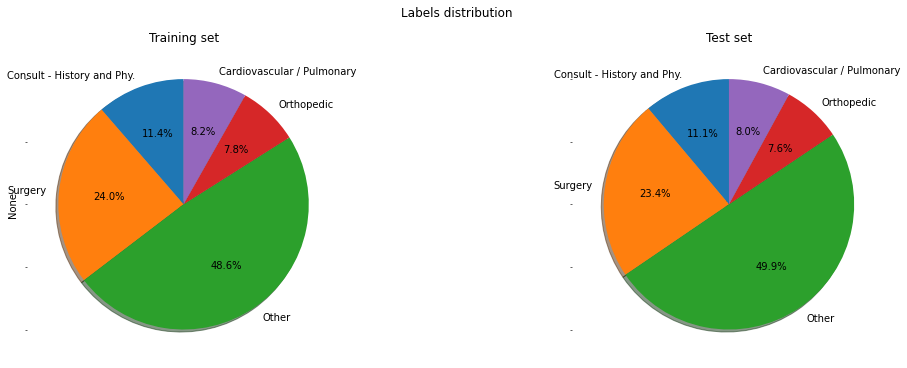

In [24]:
fig1, (ax1, ax2) =  plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(15, 5),)
train.iloc[:,:5].sum(axis=0).plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,ax=ax1)
test.iloc[:,:5].sum(axis=0).plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,ax=ax2)
# ax1.axis("equal")
# ax2.axis("equal")
fig1.suptitle('Labels distribution')
ax1.set_title('Training set')
ax2.set_title('Test set')
# xticks([])
plt.show()

# Try pre-trained model Bert





In [25]:
from transformers import *
tokenizer = BertTokenizer.from_pretrained('microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', do_lower_case=True) # tokenizer

Downloading:   0%|          | 0.00/221k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

In [26]:
df_train = pd.read_csv('train_multi_label.csv')
df_test = pd.read_csv('test_multi_label.csv')

In [27]:
del(df_train['Unnamed: 0'])
df_train

,Consult - History and Phy.,Surgery,Other,Orthopedic,Cardiovascular / Pulmonary,text
0,1,0,1,0,0,"REVIEW OF SYSTEMS,GENERAL: Negative weakness,..."
1,0,1,0,1,0,"PREOPERATIVE DIAGNOSIS: , Herniated nucleus pu..."
2,0,1,1,0,0,PREOPERATIVE DIAGNOSIS: Large juxtarenal abdo...
3,1,0,1,0,0,"GENERAL:, Negative weakness, negative fatigue..."
4,0,0,1,0,0,The patient underwent an overnight polysomnogr...
...,...,...,...,...,...,...
1975,0,1,0,0,0,"PREOPERATIVE DIAGNOSES:,1. Left carpal tunnel..."
1976,0,0,1,0,0,"HISTORY:, This is an initial visit for this 9..."
1977,0,0,1,0,0,"CHIEF COMPLAINT: , Swelling of lips causing di..."
1978,0,0,1,0,0,"PREOPERATIVE DIAGNOSIS: , Foreign body, right ..."


In [28]:
del(df_test['Unnamed: 0'])